# Exploitation des données

### Consomation en fonction du nombre d'utilisateur

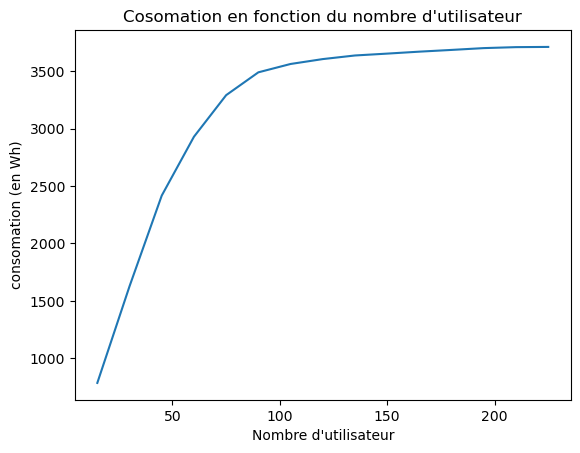

In [1]:
import json
from matplotlib import pyplot
import numpy as np

with open("../Donnees/save_graphe3.json") as json_carte:
    save = json.load(json_carte)
    
X = save["axeX"]
Y = save["axeY"]

pyplot.plot(X, Y)
pyplot.xlabel('Nombre d\'utilisateur')
pyplot.ylabel('consomation (en Wh)')
pyplot.title('Cosomation en fonction du nombre d\'utilisateur')
pyplot.show()

In [2]:
#conversion en CSV
import csv
row_list = [save["axeX"], save["axeY"]]
with open('./donnée.csv', 'w', newline='') as file:
    writer = csv.writer(file, quoting=csv.QUOTE_NONNUMERIC, delimiter=';')
    writer.writerows(row_list)

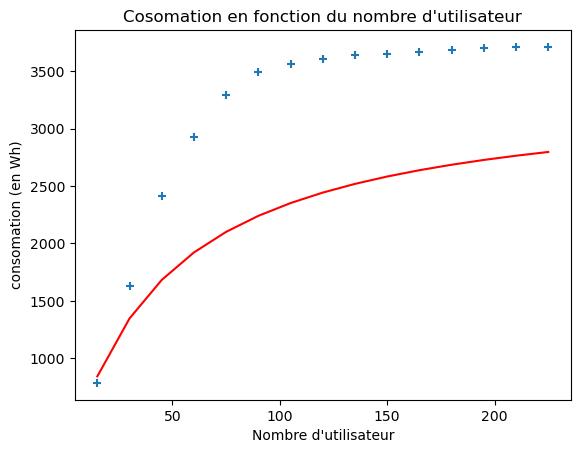

In [4]:
#modèle regressi
Vm = 3.35e3
Km = 44.6
f = lambda x : Vm*x/(Km+x)

pyplot.scatter(X, Y, marker="+")
pyplot.plot(X, f(np.array(X)), "red")
pyplot.xlabel('Nombre d\'utilisateur')
pyplot.ylabel('consomation (en Wh)')
pyplot.title('Cosomation en fonction du nombre d\'utilisateur')
pyplot.show()

### Cosomation pour une simulation donner

Valeur moyenne : 

 - Optimiser : 7925.5037wh
 - Normale : 22260.0wh 

u(consomation optimiser) = 348.9916097855075

Ecart : 64.39576055705301%

Temps : 

 - Temps totale : 492223.57285106904s




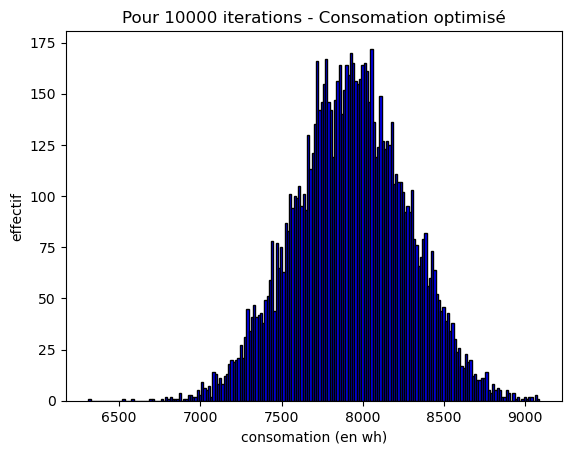

In [2]:
import json
from matplotlib import pyplot
import numpy as np

with open("./Exp1/save.json") as json_carte:
        save = json.load(json_carte)
        
iteration = save["parametre"]["nbr_simulation"]
val = save
val_opti = [ i[0] for i in save["rep_simulation"]["sim"] ]
val_norm = [ i[1] for i in save["rep_simulation"]["sim"] ]

born_min = min(val_opti) - 5
born_max = max(val_opti) + 5

# méthode montecarlo
uopti = (1/(iteration-1)*sum((np.array(val_opti)-val["rep_simulation"]["moy"][0])**2.))**0.5

print("Valeur moyenne : \n")
print(" - Optimiser : " + str(val["rep_simulation"]["moy"][0]) + "wh")
print(" - Normale : " + str(val["rep_simulation"]["moy"][1]) + "wh \n")
print("u(consomation optimiser) = " + str(uopti) + "\n")
print("Ecart : " + str(((abs(val["rep_simulation"]["moy"][0] - val["rep_simulation"]["moy"][1]) / val["rep_simulation"]["moy"][1]) * 100)) + "%\n")
print("Temps : \n")
print(" - Temps totale : " + str(val["rep_simulation"]["tps_tot"]) + "s")
print("\n")
##################################################################################################################
pyplot.hist(val_opti, range = (born_min, born_max), bins = 200, color = 'blue', edgecolor = 'black')
pyplot.xlabel('consomation (en wh)')
pyplot.ylabel('effectif')
pyplot.title('Pour ' + str(len(val_opti)) + ' iterations - Consomation optimisé')
pyplot.show()

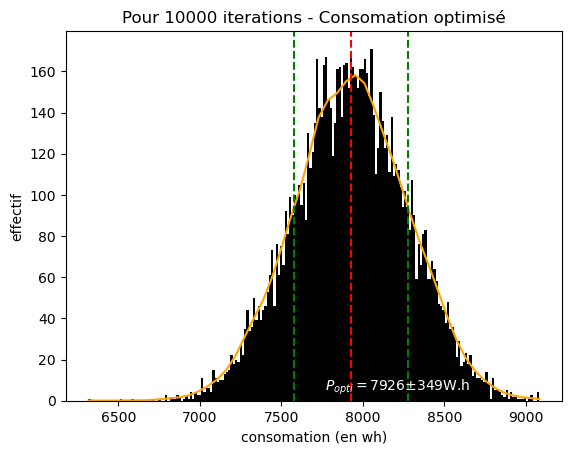

In [25]:
import scipy.stats as sts

data = val_opti
P_opti = round(val["rep_simulation"]["moy"][0])

# Kernel
kde = sts.gaussian_kde(data)
 
fig, ax = pyplot.subplots(1)
bar, bins, _ = ax.hist(data, bins=200, color="black")
 
# On trace le kernel. On met à l'échelle pour avoir la même aire sous la courbe
density = np.sum(bar * np.diff(bins)) 
x = np.linspace(min(data), max(data))
y = kde.pdf(x) * density
ax.plot(x, y, c='orange', label='KDE')
ax.axvline(x=P_opti ,color="r", ls="--")
ax.text(P_opti - (P_opti / 50), 5, r"$P_{opti} = $" + str(P_opti) + "±" + str(round(uopti)) + "W.h",fontsize=10, color="w")
ax.axvline(x=(P_opti - round(uopti)) ,color="g", ls="--")
ax.axvline(x=(P_opti + round(uopti)) ,color="g", ls="--")
pyplot.xlabel('consomation (en wh)')
pyplot.ylabel('effectif')
pyplot.title('Pour ' + str(len(val_opti)) + ' iterations - Consomation optimisé')

pyplot.show()